# Day 20: Donut Maze

https://adventofcode.com/2019/day/20#part2

## Part 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from queue import Queue

In [35]:
#inputfile = "./data/day20test1.txt"
#inputfile = "./data/day20test2.txt"
inputfile = "./data/input20.txt"

with open(inputfile) as f:
    amaze = [l.rstrip('\n') for l in f]

In [36]:
amaze

['                               H       I       J   D A       U     U       W                               ',
 '                               R       Z       M   S A       N     V       T                               ',
 '  #############################.#######.#######.###.#.#######.#####.#######.#############################  ',
 '  #.#...#.#.......#.#...#...#.........#.#.#.......#.#.....#.....#.....#.....#.............#...#.....#...#  ',
 '  #.###.#.###.#####.###.###.###.#####.#.#.#######.#.#.###.#.#####.#.###.###.###.#############.#.#.#####.#  ',
 '  #...#.#...#.#...............#...#...#...#.......#.....#.#.#.#...#.#.#.#.#.....#...#...#.#.#...#.#.....#  ',
 '  #.###.#.###.#####.#####.###.#####.###.###.#####.###.#.#.#.#.#.#.###.#.#.###.#####.###.#.#.#.#####.#####  ',
 '  #.#...........#...#...#.#.......#...#...#.....#.#...#.#.#...#.#.....#.....#.#.........#.......#.#.....#  ',
 '  #.###########.###.#.#.###.###.#.###.#.#####.#####.#####.#.#.#######.#.#####.#.#.#.#######.#####.#.#.

In [62]:
def getAdjacentBorder(n,xmax,ymax):
    '''returns list of adiacent cells'''
    x,y = n
    adj = []
    if x>=1: adj.append((x-1,y)) # W
    if y>=1: adj.append((x,y-1)) # N
    if x<xmax-1: adj.append((x+1,y)) # E
    if y<ymax-1: adj.append((x,y+1)) # S
    return adj    

def getEntrance(portalList):
    for c in portalList:
        for cc in getAdjacentBorder(c,len(amaze[0]),len(amaze)):
            x, y = cc
            ccc = amaze[y][x]
            if ccc=='.':
                return c

def findPortals(amaze):
    '''Identify and process portal positions'''
    portals = []
    j = 0
    for l in amaze:
        i = 0
        for c in l:
            if not (c=='#' or c==' ' or c=='.'): # found a portal letter
                n = (i,j)
                for a in getAdjacentBorder(n,len(amaze[0]),len(amaze)):
                    x, y = a
                    cc = amaze[y][x]
                    if not cc=='#' and not cc==' ' and not cc=='.':
                        portalName = ''.join(sorted(c+cc))
                        portalCoord = sorted([n,a])
                        portal = ( portalName, portalCoord )
                        if portal in portals:
                            continue
                        portals.append(portal)                                 
            i+=1
        j+=1
    portals.sort(key=lambda tup: tup[0]) # sort portals by name
    _start = portals[0]
    _exit = portals[-1]
    start = (0,0)
    exit = (0,0)
    # reformat start and exit
    for cell in _start[1]:
        if len(getAdjacentBorder(cell,len(amaze[0]),len(amaze)))==4:
            start = cell
    for cell in _exit[1]:
        if len(getAdjacentBorder(cell,len(amaze[0]),len(amaze)))==4:
            exit = cell
    # link portal extremes
    portals = portals[1:len(portals)-1]
    i = 0
    P = {}
    Plink = {}
    while i<len(portals):
        name = portals[i][0]
        IN = getEntrance(portals[i][1])
        OUT = getEntrance(portals[i+1][1])
        P[name] = [IN,OUT]
        Plink[IN] = OUT
        Plink[OUT] = IN
        i+=2
    return start, exit, P, Plink

# Find first walkable tile near to start and exit labels, since only '.' tiles are part of the path

def findWalkable(start,amaze):
    theStart = start
    for c in (getAdjacentBorder(start,len(amaze[0]),len(amaze))):
        x,y = c
        if amaze[y][x]==".":
            theStart = c
            return theStart

In [63]:
start, exit, P, Plink = findPortals(amaze)

theStart = findWalkable(start,amaze)
theExit = findWalkable(exit,amaze)
        
print(start,exit)
print(theStart,theExit)
print(P)
print(Plink)

(19, 1) (1, 17)
(19, 2) (2, 17)
{'AS': [(17, 9), (33, 17)], 'BU': [(25, 21), (11, 35)], 'CP': [(21, 9), (19, 35)], 'DI': [(1, 15), (9, 21)], 'FL': [(33, 21), (15, 27)], 'GQ': [(25, 17), (33, 23)], 'JO': [(1, 19), (13, 27)], 'JP': [(21, 27), (15, 35)], 'NY': [(25, 13), (1, 23)], 'TV': [(33, 11), (25, 23)]}
{(17, 9): (33, 17), (33, 17): (17, 9), (25, 21): (11, 35), (11, 35): (25, 21), (21, 9): (19, 35), (19, 35): (21, 9), (1, 15): (9, 21), (9, 21): (1, 15), (33, 21): (15, 27), (15, 27): (33, 21), (25, 17): (33, 23), (33, 23): (25, 17), (1, 19): (13, 27), (13, 27): (1, 19), (21, 27): (15, 35), (15, 35): (21, 27), (25, 13): (1, 23), (1, 23): (25, 13), (33, 11): (25, 23), (25, 23): (33, 11)}


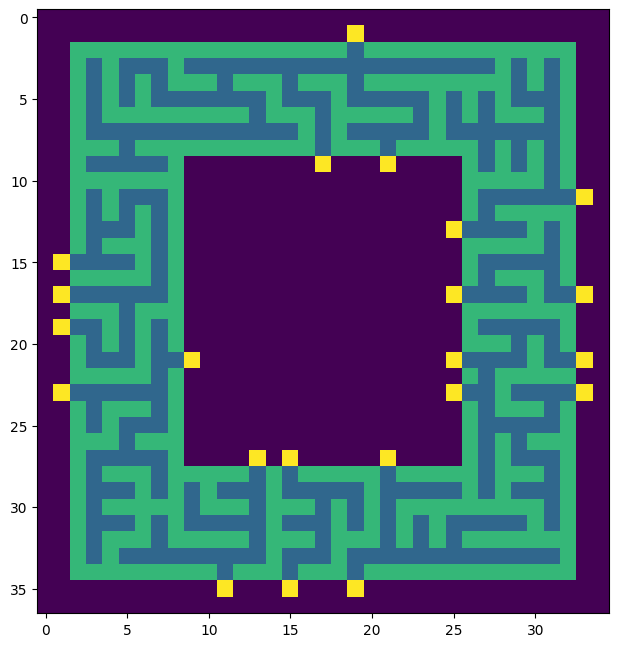

In [64]:
WALL    = 1
BORDER  = -1
EMPTY   = 0
PORTAL  = 2
VISITED = 3

def amaze2matrix(amaze):
    nrow = len(amaze)
    ncol = len(amaze[0])
    shape = (nrow,ncol)
    maze = np.zeros(shape)
    j = 0
    for l in amaze:
        i = 0
        for c in l:
            if c=='#':
                maze[j][i] = WALL
            elif c==' ':
                maze[j][i] = BORDER
            elif c=='.':
                maze[j][i] = EMPTY
            else:
                n = (i,j)
                if n in Plink.keys():
                    maze[j][i] = PORTAL
                elif n==start or n==exit:
                    maze[j][i] = PORTAL
                else:
                    maze[j][i] = BORDER
            i+=1
        j+=1
    return maze

maze = amaze2matrix(amaze)
fig = plt.figure(figsize=(8,8), dpi=100)
plt.imshow(maze)

In [65]:
def getAdjacent(n):
    '''returns list of adiacent cells'''
    x,y = n
    return [(x-1,y), # W
            (x,y-1), # N
            (x+1,y), # E
            (x,y+1)] # S

def getAdjacentPortal(n):
    '''returns list of adiacent cells accounting for portals'''
    x,y = n
    temp = [(x-1,y), (x,y-1), (x+1,y), (x,y+1)] 
    adjacent = []
    for c in temp:
        if c in Plink.keys():
            for cc in getAdjacent(Plink[c]):
                xx,yy = cc
                if maze[yy][xx] == WALL or maze[yy][xx] == BORDER:
                    continue
                else:
                    adjacent.append(cc)
        else:
            adjacent.append(c)
    return adjacent

def BFSPortal(start, end, theMaze):
    '''Find shorter path between two position in the maze using BFS algorithm'''
    maze = np.copy(theMaze)
    queue = Queue()
    queue.put([start])
    lenmax = 1
    while not queue.empty():
        path = queue.get() 
        c = path[-1] 
        if c == end:
            return path
        for a in getAdjacentPortal(c): 
            x,y = a
            if maze[y][x] == WALL or maze[y][x] == BORDER or maze[y][x] == VISITED: 
                continue
            else:
                maze[y][x] = VISITED
                new_path = list(path)
                new_path.append(a)
                queue.put(new_path) 
    return []
    
def drawPath(path,theMaze):
    maze = list(theMaze)
    for c in path:
        x,y = c
        maze[y][x] = VISITED
    return maze

In [66]:
path = BFSPortal(theStart, theExit, maze)

#print(path)
print("Steps needed = ",len(path)-1) # remove 1 to account for starting tile, according to instructions

Steps needed =  58


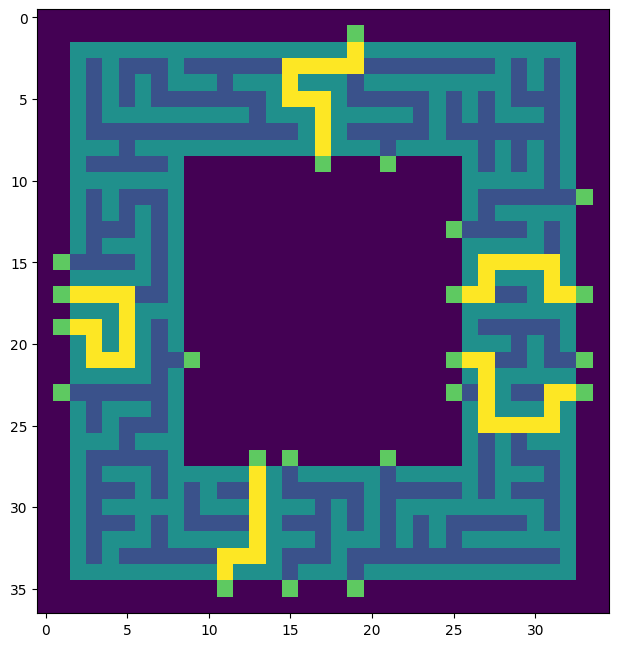

In [67]:
mazepath = drawPath(path,maze)
fig = plt.figure(figsize=(8,8), dpi=100)
plt.imshow(mazepath)

# Part 2

In [68]:
inputfile = "./data/day20test3.txt"
#inputfile = "./data/input20.txt"

with open(inputfile) as f:
    amaze = [l.rstrip('\n') for l in f]

In [69]:
start, exit, P, Plink = findPortals(amaze)

theStart = findWalkable(start,amaze)
theExit = findWalkable(exit,amaze)
        
print(start,exit)
print(theStart,theExit)
print(P)
print(Plink)

(19, 1) (1, 17)
(19, 2) (2, 17)
{'AS': [(17, 9), (33, 17)], 'BU': [(25, 21), (11, 35)], 'CP': [(21, 9), (19, 35)], 'DI': [(1, 15), (9, 21)], 'FL': [(33, 21), (15, 27)], 'GQ': [(25, 17), (33, 23)], 'JO': [(1, 19), (13, 27)], 'JP': [(21, 27), (15, 35)], 'NY': [(25, 13), (1, 23)], 'TV': [(33, 11), (25, 23)]}
{(17, 9): (33, 17), (33, 17): (17, 9), (25, 21): (11, 35), (11, 35): (25, 21), (21, 9): (19, 35), (19, 35): (21, 9), (1, 15): (9, 21), (9, 21): (1, 15), (33, 21): (15, 27), (15, 27): (33, 21), (25, 17): (33, 23), (33, 23): (25, 17), (1, 19): (13, 27), (13, 27): (1, 19), (21, 27): (15, 35), (15, 35): (21, 27), (25, 13): (1, 23), (1, 23): (25, 13), (33, 11): (25, 23), (25, 23): (33, 11)}


In [70]:
def isExternal(p):
    nrow = len(amaze)
    ncol = len(amaze[0])
    x,y = p
    if x==1 or x==ncol-2 or y==1 or y==nrow-2: 
        return True
    
p = (1, 19)
isExternal(p)

True